<a href="https://colab.research.google.com/github/ShabnaIlmi/Data-Science-Group-Project/blob/Importer_Risk_Prediction/Exploratory_Data_Analysis_FInal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Installing Necessary Libraries**

In [44]:
# Installing Required Libraries
# !pip install --upgrade tensorflow
# !pip install fancyimpute scikit-learn pandas

In [45]:
# Uninstalling the Pandas Library
# !pip uninstall pandas

In [46]:
# Re-installing the Pandas Library
# !pip install pandas==2.2.2

# **Importing Necessary Libraries**

In [47]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.cluster import KMeans
import warnings
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import shap
import pickle
import joblib

In [48]:
# Mounting the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Loading the Dataset**

In [49]:
# Loading the dataset with the proper delimiter (semicolon)
data = pd.read_excel('/content/drive/MyDrive/Importer_Risk_Prediction_2/Dataset/IMPORT STATISTICS - 2023.xlsx')

In [50]:
# Displaying the first few rows of the data
data.head()

,IMPORTER,YEAR,MONTH,HSCODE,COUNTRY,UNIT,QUANTITY,VALUE_RS,DESCRIPTION_01,DESCRIPTION_02,DESCRIPTION_03
0,Unknown,2023.0,JANUARY,280110,BANGLADESH,Kg.,131600.0,13877114.0,Inorganic chemicals; Organic or inorganic comp...,"Fluorine, chlorine, bromine and iodine ...",Chlorine
1,Unknown,2023.0,JANUARY,280110,INDIA,Kg.,37800.0,3924989.0,Inorganic chemicals; Organic or inorganic comp...,"Fluorine, chlorine, bromine and iodine ...",Chlorine
2,Unknown,2023.0,JANUARY,280110,MALAYSIA,Kg.,12090.0,5390772.0,Inorganic chemicals; Organic or inorganic comp...,"Fluorine, chlorine, bromine and iodine ...",Chlorine
3,Unknown,2023.0,FEBRUARY,280110,BANGLADESH,Kg.,25200.0,3089445.0,Inorganic chemicals; Organic or inorganic comp...,"Fluorine, chlorine, bromine and iodine ...",Chlorine
4,Unknown,2023.0,FEBRUARY,280110,INDIA,Kg.,75599.0,6939860.0,Inorganic chemicals; Organic or inorganic comp...,"Fluorine, chlorine, bromine and iodine ...",Chlorine


# **Exploratory Data Analysis**

In [51]:
# Displaying information
print("Displaying data information")
data.info()

Displaying data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   IMPORTER        1042 non-null   object 
 1   YEAR            292 non-null    float64
 2   MONTH           292 non-null    object 
 3   HSCODE          1042 non-null   int64  
 4   COUNTRY         1038 non-null   object 
 5   UNIT            1042 non-null   object 
 6   QUANTITY        1039 non-null   float64
 7   VALUE_RS        292 non-null    float64
 8   DESCRIPTION_01  1042 non-null   object 
 9   DESCRIPTION_02  1042 non-null   object 
 10  DESCRIPTION_03  1042 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 89.7+ KB


### **Identifying Categorical and Numerical Columns**

In [52]:
# Identifying categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

**Since 'HSCODE' column has been misintepreted as an int64 data type column due to the unavailability of data, reassigning it has an object type column.**

In [53]:
# Converting 'IMPORTER' and 'HSCODE' columns to string type
data['HSCODE'] = data['HSCODE'].astype(str)

# Displaying the HSCODE column data type
print("Data Type of HSCODE Columns:")
print(data[['HSCODE']].dtypes)

Data Type of HSCODE Columns:
HSCODE    object
dtype: object


## **Categorical Features**

In [54]:
# List of categorical features
categorical_features = data.select_dtypes(include=['object']).columns

# Displaying the categorical features
print("Categorical Features:")
for feature in categorical_features:
    print(f"- {feature}")

# Display data type of the columns
print("\nData Type of Categorical Features:")
print(data[categorical_features].dtypes)

Categorical Features:
- IMPORTER
- MONTH
- HSCODE
- COUNTRY
- UNIT
- DESCRIPTION_01
- DESCRIPTION_02
- DESCRIPTION_03

Data Type of Categorical Features:
IMPORTER          object
MONTH             object
HSCODE            object
COUNTRY           object
UNIT              object
DESCRIPTION_01    object
DESCRIPTION_02    object
DESCRIPTION_03    object
dtype: object


**Unique Values and Their Counts Relevant to Each Categorical Column**

In [55]:
# Displaying the unique values and their counts relevant to each categorical column
print("Unique values and their count relevant to each categorical column:\n")
for col in categorical_features:
    unique_values = data[col].unique()
    value_counts = data[col].value_counts()
    print(value_counts)
    print(" ")

Unique values and their count relevant to each categorical column:

IMPORTER
Unknown    1042
Name: count, dtype: int64
 
MONTH
NOVEMBER     191
FEBRUARY      13
JULY          13
MAY           11
SEPTEMBER     11
JANUARY       10
JUNE           9
AUGUST         8
OCTOBER        8
MARCH          6
APRIL          6
DECEMBER       6
Name: count, dtype: int64
 
HSCODE
28070010      85
2847000000    84
28080000      67
3102401000    58
28291100      54
              ..
2801200032     1
2801200031     1
2801200030     1
2801200029     1
2812101100     1
Name: count, Length: 131, dtype: int64
 
COUNTRY
Vietnam    299
Russia     109
Kenya       71
Ukraine     58
germany     51
          ... 
U.S.A.       1
Mexico       1
CANADA       1
India        1
Romania      1
Name: count, Length: 66, dtype: int64
 
UNIT
Kg     750
Kg.    112
KGS     47
PCS     39
NOS     33
GMS     23
MTS     19
LTR     18
DRM      1
Name: count, dtype: int64
 
DESCRIPTION_01
Inorganic chemicals; Organic or inorganic comp

In [56]:
# Displaying the categorical columns which contains null values and their counts
print("Categorical columns with null values and their counts:")
for col in categorical_features:
    null_count = data[col].isnull().sum()
    if null_count > 0:
        print(f"{col}: {null_count}")

Categorical columns with null values and their counts:
MONTH: 750
COUNTRY: 4


In [57]:
# Displaying the categorical columns which contain 'Unknown' values and their relevant counts
print("Categorical columns with 'Unknown' values and their counts:")
for col in categorical_features:
    unknown_count = (data[col] == 'Unknown').sum()
    if unknown_count > 0:
        print(f"{col}: {unknown_count}")

Categorical columns with 'Unknown' values and their counts:
IMPORTER: 1042


## **Numerical Features**

**Since 'Year' column has been misintepreted as a float64 data type column reassigning it as a int64 type column**


In [58]:
# Converting the 'Year' column to int64 data type
# data['YEAR'] = data['YEAR'].astype(int)

# Displaying the data type of the 'Year' column
# print("Data Type of 'Year' Column:")
# print(data['YEAR'].dtype)

**The conversion cannot be done since the column contains missing values (both N/A and null values)**

In [59]:
# Numerical Features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns

# Displaying the Numerical Columns
print("Numerical Features:")
print(numerical_features)

Numerical Features:
Index(['YEAR', 'QUANTITY', 'VALUE_RS'], dtype='object')


**Unique Values and Their Count Relevant to Each Numerical Column**

In [60]:
# Displaying the unique values and their count in the numerical columns
print("Unique values and their count in the numerical columns:\n")
for col in numerical_features:
    unique_values = data[col].unique()
    value_counts = data[col].value_counts()
    print(value_counts)
    print(" ")

Unique values and their count in the numerical columns:

YEAR
2016.0    180
2023.0    112
Name: count, dtype: int64
 
QUANTITY
1000.0     55
1.0        49
16200.0    40
5.0        31
27.0       28
           ..
204.0       1
23200.0     1
22820.0     1
22560.0     1
19050.0     1
Name: count, Length: 359, dtype: int64
 
VALUE_RS
0.40           4
53.79          3
188.55         3
0.20           3
21.15          2
              ..
350598.00      1
2213950.00     1
10318355.00    1
24988179.00    1
0.68           1
Name: count, Length: 263, dtype: int64
 


**Numerical columns with null values and their relevant counts**

In [61]:
# Displaying the numerical columns with null values and their relevant counts
print("Numerical columns with null values and their relevant counts:")
for col in numerical_cols:
    null_count = data[col].isnull().sum()
    if null_count > 0:
        print(f"{col}: {null_count}")

Numerical columns with null values and their relevant counts:
YEAR: 750
QUANTITY: 3
VALUE_RS: 750


# **Data Preprocessing**

## **Data Cleaning**

In [62]:
# Step 1: Removing whitespaces from the object type columns
object_columns = data.select_dtypes(include=['object']).columns
data[object_columns] = data[object_columns].apply(lambda x: x.str.strip())

In [63]:
# Step 2: Dropping duplicate values
data.drop_duplicates(inplace=True)
data.reset_index(drop=True, inplace=True)

In [64]:
# Display dataset information
print("\nDataset information after removing duplicates:")
data.info()


Dataset information after removing duplicates:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 655 entries, 0 to 654
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   IMPORTER        655 non-null    object 
 1   YEAR            288 non-null    float64
 2   MONTH           288 non-null    object 
 3   HSCODE          655 non-null    object 
 4   COUNTRY         652 non-null    object 
 5   UNIT            655 non-null    object 
 6   QUANTITY        653 non-null    float64
 7   VALUE_RS        288 non-null    float64
 8   DESCRIPTION_01  655 non-null    object 
 9   DESCRIPTION_02  655 non-null    object 
 10  DESCRIPTION_03  655 non-null    object 
dtypes: float64(3), object(8)
memory usage: 56.4+ KB


In [65]:
# Step 3: Removing unnecessary full stops(".") from the categorical columns
data[categorical_cols] = data[categorical_cols].apply(lambda x: x.str.replace('.', ''))

In [66]:
# Step 4: Removing unnecessary special characters and trailing spaces from the 'DESCRIPTION_03' column
# Removing the leading hyphen
data['DESCRIPTION_03'] = data['DESCRIPTION_03'].str.lstrip('-')

# Removing trailing spaces
data['DESCRIPTION_03'] = data['DESCRIPTION_03'].str.strip()

In [67]:
# Step 5: Removing trailing spaces for the entire 'DESCRIPTION_02' column
data['DESCRIPTION_02'] = data['DESCRIPTION_02'].str.strip()

In [68]:
# Displaying the unique values and their counts relevant to each categorical column
print("Unique values and their count relevant to each categorical column:\n")
for col in categorical_features:
    unique_values = data[col].unique()
    value_counts = data[col].value_counts()
    print(value_counts)
    print(" ")

Unique values and their count relevant to each categorical column:

IMPORTER
Unknown    655
Name: count, dtype: int64
 
MONTH
NOVEMBER     187
FEBRUARY      13
JULY          13
MAY           11
SEPTEMBER     11
JANUARY       10
JUNE           9
AUGUST         8
OCTOBER        8
MARCH          6
APRIL          6
DECEMBER       6
Name: count, dtype: int64
 
HSCODE
2847000000    50
28070010      37
280800        36
284700        35
280110        34
              ..
2801200032     1
2801200031     1
2801200030     1
2801200029     1
2812101100     1
Name: count, Length: 131, dtype: int64
 
COUNTRY
Russia       102
Vietnam       74
germany       48
Ukraine       38
Kenya         36
            ... 
DENMARK        1
indonesia      1
AUSTRIA        1
PAKISTAN       1
egypt          1
Name: count, Length: 66, dtype: int64
 
UNIT
Kg     479
KGS     46
PCS     36
NOS     33
GMS     23
MTS     19
LTR     18
DRM      1
Name: count, dtype: int64
 
DESCRIPTION_01
Inorganic chemicals; Organic or inor

In [69]:
# Step 6: Converting all the values in the 'COUNTRY' and the 'UNIT' columns to uppercase values
data['COUNTRY'] = data['COUNTRY'].str.upper()
data['UNIT'] = data['UNIT'].str.upper()

# Displaying the modified dataset
print(data)

    IMPORTER    YEAR     MONTH      HSCODE     COUNTRY UNIT  QUANTITY  \
0    Unknown  2023.0   JANUARY      280110  BANGLADESH   KG  131600.0   
1    Unknown  2023.0   JANUARY      280110       INDIA   KG   37800.0   
2    Unknown  2023.0   JANUARY      280110    MALAYSIA   KG   12090.0   
3    Unknown  2023.0  FEBRUARY      280110  BANGLADESH   KG   25200.0   
4    Unknown  2023.0  FEBRUARY      280110       INDIA   KG   75599.0   
..       ...     ...       ...         ...         ...  ...       ...   
650  Unknown     NaN       NaN    28121043     BELGIUM   KG   19740.0   
651  Unknown     NaN       NaN  2812101100     UKRAINE   KG       NaN   
652  Unknown     NaN       NaN    28121043     BELGIUM   KG   19320.0   
653  Unknown     NaN       NaN    28121043     BELGIUM   KG   19050.0   
654  Unknown     NaN       NaN  2812109900     UKRAINE   KG       NaN   

       VALUE_RS                                     DESCRIPTION_01  \
0    13877114.0  Inorganic chemicals; Organic or inor

In [70]:
# Step 7: Handling the HSCODES

# Checking the length of the HSCODES and determining the maximum length
data['HSCODE_LENGTH'] = data['HSCODE'].apply(len)
max_length = data['HSCODE_LENGTH'].max()

# Padding HSCODE values with trailing zeros to match the maximum length
data['HSCODE'] = data['HSCODE'].apply(lambda x: x.ljust(max_length, '0'))

# Dropping the helper column 'HSCODE_LENGTH' as it's no longer needed
data.drop(columns=['HSCODE_LENGTH'], inplace=True)

# Displaying the modified dataset
print(data)

    IMPORTER    YEAR     MONTH      HSCODE     COUNTRY UNIT  QUANTITY  \
0    Unknown  2023.0   JANUARY  2801100000  BANGLADESH   KG  131600.0   
1    Unknown  2023.0   JANUARY  2801100000       INDIA   KG   37800.0   
2    Unknown  2023.0   JANUARY  2801100000    MALAYSIA   KG   12090.0   
3    Unknown  2023.0  FEBRUARY  2801100000  BANGLADESH   KG   25200.0   
4    Unknown  2023.0  FEBRUARY  2801100000       INDIA   KG   75599.0   
..       ...     ...       ...         ...         ...  ...       ...   
650  Unknown     NaN       NaN  2812104300     BELGIUM   KG   19740.0   
651  Unknown     NaN       NaN  2812101100     UKRAINE   KG       NaN   
652  Unknown     NaN       NaN  2812104300     BELGIUM   KG   19320.0   
653  Unknown     NaN       NaN  2812104300     BELGIUM   KG   19050.0   
654  Unknown     NaN       NaN  2812109900     UKRAINE   KG       NaN   

       VALUE_RS                                     DESCRIPTION_01  \
0    13877114.0  Inorganic chemicals; Organic or inor

In [71]:
# Step 8: Handling the 'COUNTRY' Column

# Replacing specific country names
data['COUNTRY'] = data['COUNTRY'].replace({
    'United States': 'USA',
    'United States of America': 'USA',
    'United Kingdom': 'UK',
    'Korea, Republic of': 'South Korea'
})

print(data)

    IMPORTER    YEAR     MONTH      HSCODE     COUNTRY UNIT  QUANTITY  \
0    Unknown  2023.0   JANUARY  2801100000  BANGLADESH   KG  131600.0   
1    Unknown  2023.0   JANUARY  2801100000       INDIA   KG   37800.0   
2    Unknown  2023.0   JANUARY  2801100000    MALAYSIA   KG   12090.0   
3    Unknown  2023.0  FEBRUARY  2801100000  BANGLADESH   KG   25200.0   
4    Unknown  2023.0  FEBRUARY  2801100000       INDIA   KG   75599.0   
..       ...     ...       ...         ...         ...  ...       ...   
650  Unknown     NaN       NaN  2812104300     BELGIUM   KG   19740.0   
651  Unknown     NaN       NaN  2812101100     UKRAINE   KG       NaN   
652  Unknown     NaN       NaN  2812104300     BELGIUM   KG   19320.0   
653  Unknown     NaN       NaN  2812104300     BELGIUM   KG   19050.0   
654  Unknown     NaN       NaN  2812109900     UKRAINE   KG       NaN   

       VALUE_RS                                     DESCRIPTION_01  \
0    13877114.0  Inorganic chemicals; Organic or inor

In [72]:
# Displaying the unique values and their counts relevant to each categorical column
print("Unique values and their count relevant to each categorical column:\n")
for col in categorical_features:
    unique_values = data[col].unique()
    value_counts = data[col].value_counts()
    print(value_counts)
    print(" ")

Unique values and their count relevant to each categorical column:

IMPORTER
Unknown    655
Name: count, dtype: int64
 
MONTH
NOVEMBER     187
FEBRUARY      13
JULY          13
MAY           11
SEPTEMBER     11
JANUARY       10
JUNE           9
AUGUST         8
OCTOBER        8
MARCH          6
APRIL          6
DECEMBER       6
Name: count, dtype: int64
 
HSCODE
2847000000    109
2808000000     74
2807001000     37
2801100000     34
3102401000     22
             ... 
2801200029      1
2801200028      1
2801200027      1
2801200026      1
2812101100      1
Name: count, Length: 117, dtype: int64
 
COUNTRY
RUSSIA                  102
VIETNAM                  74
BELGIUM                  51
GERMANY                  49
UKRAINE                  38
KENYA                    36
INDIA                    29
CHINA                    28
COLOMBIA                 27
BANGLADESH               26
UNITED STATES            22
MALAYSIA                 19
SOUTH KOREA              18
UNITED KINGDOM          

## **Handling Missing Values**

**Handling missing values in the categorical columns**

**Replacing all the missing values with 'Unknown'**

In [73]:
# Step 12: Handling missing values in the categorical columns

# Replacing all the missing values in the categorical columns with 'Unknown' for imputation
data[categorical_features] = data[categorical_features].fillna('Unknown')

**Checking for any missing values which is left behind when replacing with 'Unkown'**

In [74]:
# Verifying the changes after replacing the missing values with 'Unknown'
print("Checking for any missing values left behind after replacing with 'Unknown':")
for col in categorical_features:
    null_count = data[col].isnull().sum()
    if null_count > 0:
        print(f"{col}: {null_count} missing values")
    else:
        print(f"{col}: No missing values")
    print(" ")

Checking for any missing values left behind after replacing with 'Unknown':
IMPORTER: No missing values
 
MONTH: No missing values
 
HSCODE: No missing values
 
COUNTRY: No missing values
 
UNIT: No missing values
 
DESCRIPTION_01: No missing values
 
DESCRIPTION_02: No missing values
 
DESCRIPTION_03: No missing values
 


In [75]:
# Handling the 'Unknown' values in the 'COUNTRY' column using the mode
mode_country = data['COUNTRY'].mode()[0]
data['COUNTRY'] = data['COUNTRY'].replace('Unknown', mode_country)

In [76]:
# Dropping the 'MONTH' and 'IMPORTERS' Columns due to the significant amount of null values
data.drop(columns=['MONTH', 'IMPORTER', 'DESCRIPTION_02'], inplace=True)

In [77]:
# Displaying dataset information
print("\nDataset information after categorical imputation:")
data.info()


Dataset information after categorical imputation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 655 entries, 0 to 654
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   YEAR            288 non-null    float64
 1   HSCODE          655 non-null    object 
 2   COUNTRY         655 non-null    object 
 3   UNIT            655 non-null    object 
 4   QUANTITY        653 non-null    float64
 5   VALUE_RS        288 non-null    float64
 6   DESCRIPTION_01  655 non-null    object 
 7   DESCRIPTION_03  655 non-null    object 
dtypes: float64(3), object(5)
memory usage: 41.1+ KB


In [78]:
# Display unique values in the 'COUNTRY' column
unique_countries = data['COUNTRY'].unique()
print("Unique Countries:")
print(unique_countries)

Unique Countries:
['BANGLADESH' 'INDIA' 'MALAYSIA' 'AUSTRIA' 'CHINA' 'USA' 'SOUTH KOREA'
 'THAILAND' 'GERMENY' 'CANADA' 'DENMARK' 'UK' 'JAPAN' 'PAKISTAN'
 'NETHERLANDS (HOLAND)' 'BELGIUM' 'SINGAPORE' 'SPAIN' 'FRANCE' 'GERMANY'
 'ISRAEL' 'CHILE' 'SWITZERLAND' 'UNITED STATES' 'TURKMENISTAN'
 'KOREA,REPUBLIC OF' 'UNITED KINGDOM' 'TAIWAN' 'RUSSIA' 'VIETNAM'
 'US VIRGIN ISLANDS' 'KENYA' 'UKRAINE' 'URUGUAY' 'COLOMBIA' 'INDONESIA'
 'KAZAKHSTAN' 'CAMBODIA' 'MEXICO' 'SLOVENIA' 'ROMANIA' 'SLOVAKIA' 'EGYPT'
 'SAUDI ARABIA' 'ITALY' 'UNITED ARAB EMIRATES' 'NIGERIA' 'SOUTH AFRICA'
 'SRI LANKA' 'ARGENTINA' 'BRAZIL' 'GEORGIA']


In [79]:
# Display the unique values in the 'UNIT' column
unique_units = data['UNIT'].unique()
print("Unique Units:")
print(unique_units)

Unique Units:
['KG' 'LTR' 'PCS' 'KGS' 'NOS' 'GMS' 'MTS' 'DRM']


In [80]:
# Displaying the unique values in the 'DESCRIPTION_01' column
unique_descriptions_01 = data['DESCRIPTION_01'].unique()
print("Unique Descriptions_01:")
print(unique_descriptions_01)

Unique Descriptions_01:
['Inorganic chemicals; Organic or inorganic compounds of precious metals, of rare earth metals, of radioactive elements or of isotopes'
 'Fertilizers']


In [81]:
# Displaying the unique values in the 'DESCRIPTION_02' column
# unique_descriptions_02 = data['DESCRIPTION_02'].unique()
# print("Unique Descriptions_02:")
# print(unique_descriptions_02)

In [82]:
# Displaying the unique values in the 'DESCRIPTION_03' column
unique_descriptions_03 = data['DESCRIPTION_03'].unique()
print("Unique Descriptions_03:")
print(unique_descriptions_03)

Unique Descriptions_03:
['Chlorine' 'Nitric acid; sulphonitric acids'
 'Cyanides and cyanide oxides : Of sodium'
 'Cyanides and cyanide oxides : Other'
 'Hydrogen peroxide, whether or not solidified with urea' 'Iodine'
 'Bromine'
 'Chlorates and perchlorates; bromates and perbromates; iodates and periodates'
 'Mineral or chemical fertilizers, nitrogenous' 'Sulphuric acid; oleum'
 'Halides and halide oxides of non metals'
 'Fluorides; fluorosilicates, fluoroaluminates, and other complex fluorine salts']


# **Data Encoding**

In [83]:
import joblib
from sklearn.preprocessing import OneHotEncoder
import os
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Initialize a dictionary to store encoders
encoders = {}

# Define the directory where you want to save the encoders
encoder_directory = '/content/drive/MyDrive/Importer_Risk_Prediction_2/encoders/'

# Ensure the directory exists
os.makedirs(encoder_directory, exist_ok=True)

# Encoding categorical columns
encoding_columns = ['HSCODE', 'COUNTRY', 'UNIT', 'DESCRIPTION_01','DESCRIPTION_03']
for col in encoding_columns:
    one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    encoded = one_hot_encoder.fit_transform(data[[col]])
    encoded_data = pd.DataFrame(encoded, columns=[f'{col}_{category}' for category in one_hot_encoder.categories_[0]])

    # Concatenate the encoded columns with the original dataset, keeping the original column
    data = pd.concat([data, encoded_data], axis=1)

    # Save the encoder for the column with the column name as the file name in the specified directory
    encoder_filename = os.path.join(encoder_directory, f'{col}_encoder.pkl')
    joblib.dump(one_hot_encoder, encoder_filename)
    encoders[col] = one_hot_encoder
    print(f"One-Hot Encoding applied to column: {col} and encoder saved as {encoder_filename}")


One-Hot Encoding applied to column: HSCODE and encoder saved as /content/drive/MyDrive/Importer_Risk_Prediction_2/encoders/HSCODE_encoder.pkl
One-Hot Encoding applied to column: COUNTRY and encoder saved as /content/drive/MyDrive/Importer_Risk_Prediction_2/encoders/COUNTRY_encoder.pkl
One-Hot Encoding applied to column: UNIT and encoder saved as /content/drive/MyDrive/Importer_Risk_Prediction_2/encoders/UNIT_encoder.pkl
One-Hot Encoding applied to column: DESCRIPTION_01 and encoder saved as /content/drive/MyDrive/Importer_Risk_Prediction_2/encoders/DESCRIPTION_01_encoder.pkl
One-Hot Encoding applied to column: DESCRIPTION_03 and encoder saved as /content/drive/MyDrive/Importer_Risk_Prediction_2/encoders/DESCRIPTION_03_encoder.pkl


## **Handling missing values in the numerical columns**

**Using K-NN Imputaion to efficiently capture the small missing values and the captures local patterns in the 'Quantity' coulmn**

In [84]:
# Step 14: Handling missing values in the numerical columns

# KNN Imputation for 'QUANTITY'
knn_imputer = KNNImputer(n_neighbors=5)
data[['QUANTITY']] = knn_imputer.fit_transform(data[['QUANTITY']])

In [85]:
# Step 15: Dropping the 'YEAR' n the 'VALUE_RS' Column
data.drop(columns=['YEAR', 'VALUE_RS'], inplace=True)

## **Handling the Outliers**

In [86]:
# Step 16: Handling the outliers in the numerical columns

# Assigning the Numerical Columns for the outlier analysis
outlier_columns = ["QUANTITY"]

# Creating an empty dictionary to store the outliers
outlier_info = {}

for column in outlier_columns:
    Q1, Q3 = data[column].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detecting outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    outlier_info[column] = {
        'Outliers': len(outliers),
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound
    }

    print(f"Column: {column}")
    print(f"  Outliers: {outlier_info[column]['Outliers']}, Lower: {lower_bound:.2f}, Upper: {upper_bound:.2f}")
    print(" ")

Column: QUANTITY
  Outliers: 87, Lower: -30370.00, Upper: 50670.00
 


## **Visualization of the Outliers**

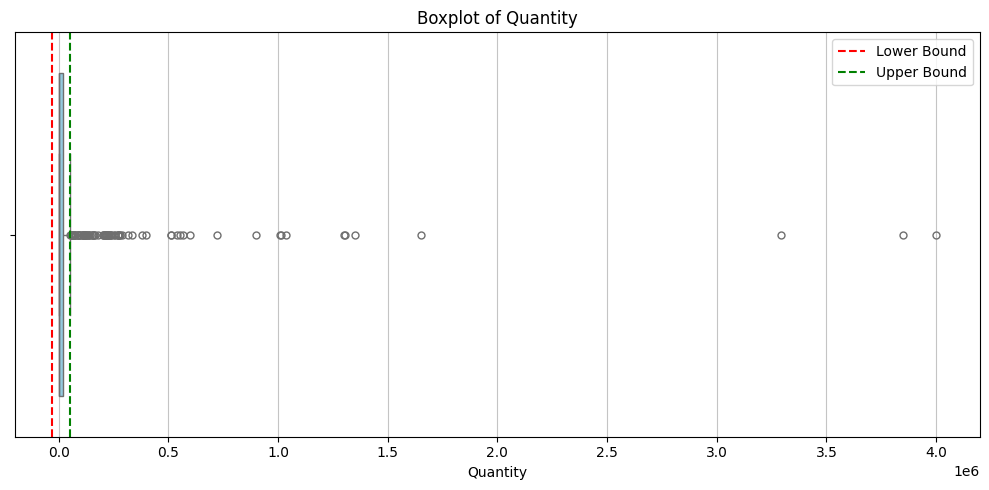

In [87]:
# Visualizing the outliers for Quantity
plt.figure(figsize=(10, 5))
Q1 = data['QUANTITY'].quantile(0.25)
Q3 = data['QUANTITY'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

sns.boxplot(x=data['QUANTITY'], color='skyblue', flierprops=dict(marker='o', color='red', markersize=5))
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='green', linestyle='--', label='Upper Bound')
plt.title('Boxplot of Quantity')
plt.xlabel('Quantity')
plt.legend()
plt.grid(axis='x', alpha=0.75)
plt.tight_layout()
plt.show()

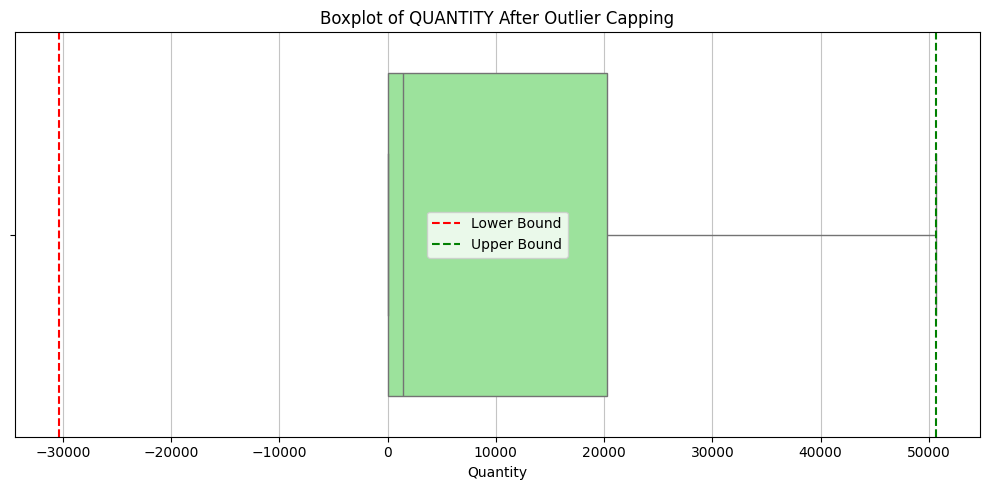


Cleaned Data (Outliers Capped):
        HSCODE     COUNTRY UNIT  QUANTITY  \
0  2801100000  BANGLADESH   KG   50670.0   
1  2801100000       INDIA   KG   37800.0   
2  2801100000    MALAYSIA   KG   12090.0   
3  2801100000  BANGLADESH   KG   25200.0   
4  2801100000       INDIA   KG   50670.0   

                                      DESCRIPTION_01 DESCRIPTION_03  \
0  Inorganic chemicals; Organic or inorganic comp...       Chlorine   
1  Inorganic chemicals; Organic or inorganic comp...       Chlorine   
2  Inorganic chemicals; Organic or inorganic comp...       Chlorine   
3  Inorganic chemicals; Organic or inorganic comp...       Chlorine   
4  Inorganic chemicals; Organic or inorganic comp...       Chlorine   

   HSCODE_2801100000  HSCODE_2801200000  HSCODE_2801200001  HSCODE_2801200002  \
0                1.0                0.0                0.0                0.0   
1                1.0                0.0                0.0                0.0   
2                1.0           

In [88]:
# Handling outliers by capping at the lower and upper bounds
for column in outlier_columns:
    data[column] = np.where(data[column] < outlier_info[column]['Lower Bound'], outlier_info[column]['Lower Bound'], data[column])
    data[column] = np.where(data[column] > outlier_info[column]['Upper Bound'], outlier_info[column]['Upper Bound'], data[column])

# Visualizing the QUANTITY column after outlier capping
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['QUANTITY'], color='lightgreen', flierprops=dict(marker='o', color='red', markersize=5))
plt.axvline(outlier_info['QUANTITY']['Lower Bound'], color='red', linestyle='--', label='Lower Bound')
plt.axvline(outlier_info['QUANTITY']['Upper Bound'], color='green', linestyle='--', label='Upper Bound')
plt.title('Boxplot of QUANTITY After Outlier Capping')
plt.xlabel('Quantity')
plt.legend()
plt.grid(axis='x', alpha=0.75)
plt.tight_layout()
plt.show()

# Displaying the cleaned dataset
print("\nCleaned Data (Outliers Capped):\n", data.head())

In [89]:
# Step 17: Normalizing Quantity
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
data['QUANTITY'] = scaler.fit_transform(data[['QUANTITY']])

In [90]:
# Displaying Dataset Information
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 655 entries, 0 to 654
Columns: 197 entries, HSCODE to DESCRIPTION_03_Sulphuric acid; oleum
dtypes: float64(192), object(5)
memory usage: 1008.2+ KB
None


In [91]:
# Displaying Dataset Head
print(data.head())

       HSCODE     COUNTRY UNIT  QUANTITY  \
0  2801100000  BANGLADESH   KG  2.428578   
1  2801100000       INDIA   KG  1.793337   
2  2801100000    MALAYSIA   KG  0.524334   
3  2801100000  BANGLADESH   KG  1.171422   
4  2801100000       INDIA   KG  2.428578   

                                      DESCRIPTION_01 DESCRIPTION_03  \
0  Inorganic chemicals; Organic or inorganic comp...       Chlorine   
1  Inorganic chemicals; Organic or inorganic comp...       Chlorine   
2  Inorganic chemicals; Organic or inorganic comp...       Chlorine   
3  Inorganic chemicals; Organic or inorganic comp...       Chlorine   
4  Inorganic chemicals; Organic or inorganic comp...       Chlorine   

   HSCODE_2801100000  HSCODE_2801200000  HSCODE_2801200001  HSCODE_2801200002  \
0                1.0                0.0                0.0                0.0   
1                1.0                0.0                0.0                0.0   
2                1.0                0.0                0.0       

## **Assigning the Target Variable**

In [92]:
import numpy as np
from sklearn.cluster import KMeans

# Selecting only the encoded columns for clustering
encoded_columns = [f'{col}_{category}' for col in encoding_columns for category in encoders[col].categories_[0]]
encoded_data = data[encoded_columns]

# Performing K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(encoded_data)

# Assigning numerical risk scores based on cluster
data['RISK_SCORE'] = clusters * 25

# Define Risk Score Thresholds
high_risk_score_threshold = 50
moderate_risk_score_threshold = 25
low_risk_score_threshold = 0

# Define Quantity Thresholds
high_risk_quantity_threshold = 150000  # ≤ 150,000
moderate_risk_quantity_threshold = 80000  # ≤ 80,000
low_risk_quantity_threshold = 25000  # ≤ 25,000

# Assigning Risk Labels Based on Score & Quantity
def assign_risk_label(row):
    if row['RISK_SCORE'] >= high_risk_score_threshold and row['QUANTITY'] <= high_risk_quantity_threshold:
        return "High Risk"
    elif row['RISK_SCORE'] >= moderate_risk_score_threshold and row['QUANTITY'] <= moderate_risk_quantity_threshold:
        return "Moderate Risk"
    elif row['RISK_SCORE'] >= low_risk_score_threshold and row['QUANTITY'] <= low_risk_quantity_threshold:
        return "Low Risk"
    else:
        return "No Risk"

# Apply risk label function
data['RISK'] = data.apply(assign_risk_label, axis=1)

# Dropping the numerical risk score column
data.drop(columns=['RISK_SCORE'], inplace=True)

print("Risk levels assigned based on risk score and quantity thresholds.")

Risk levels assigned based on risk score and quantity thresholds.


In [93]:
# Display Dataset Information
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 655 entries, 0 to 654
Columns: 198 entries, HSCODE to RISK
dtypes: float64(192), object(6)
memory usage: 1013.3+ KB
None


In [94]:
# Print Unique Values for All Columns
for col in data.columns:
    print(f"Unique values in '{col}':")
    print(data[col].unique())
    print('-' * 40)

Unique values in 'HSCODE':
['2801100000' '2808000000' '2837110000' '2837190000' '2847000000'
 '2808001000' '2801200000' '2801302000' '2837209000' '2837191000'
 '2837202000' '2837199000' '2801200001' '2801200002' '2801200003'
 '2801200004' '2801200005' '2801200006' '2801200007' '2801200008'
 '2801200009' '2801200010' '2801200011' '2801200012' '2801200013'
 '2801200014' '2801200015' '2801200016' '2801200017' '2801200018'
 '2801200019' '2801200020' '2801200021' '2801200022' '2801200023'
 '2801200024' '2801200025' '2801200026' '2801200027' '2801200028'
 '2801200029' '2801200030' '2801200031' '2801200032' '2801200033'
 '2801200034' '2801200035' '2801200036' '2801200037' '2801200038'
 '2801200039' '2801200040' '2801200041' '2801200042' '2801200043'
 '2801200044' '2801200045' '2801200046' '2801200047' '2801200048'
 '2801200049' '2801200050' '2801200051' '2801200052' '2801200053'
 '2801200054' '2801200055' '2801200056' '2801200057' '2801200058'
 '2801200059' '2801200060' '2801200061' '28012000

In [95]:
# Saving the Preprocessed Code
data.to_csv('/content/drive/MyDrive/Importer_Risk_Prediction_2/Dataset/Preprocessed_before_data.csv', index=False)

In [96]:
# Create a list to hold the one-hot encoded column names
encoded_columns = [f'{col}_{category}' for col in encoding_columns for category in encoders[col].categories_[0]]

# Loop through each encoded column name that was generated during one-hot encoding
for col in encoding_columns:
    # One-hot encode the columns
    encoded_columns.extend([f'{col}_{category}' for category in encoders[col].categories_[0]])

# Drop the one-hot encoded columns
data.drop(columns=encoded_columns, inplace=True)

print("One-hot encoded columns dropped while keeping the original columns.")

One-hot encoded columns dropped while keeping the original columns.


In [97]:
from sklearn.preprocessing import LabelEncoder
import joblib

# List of categorical columns to encode
categorical_columns = ['HSCODE', 'COUNTRY', 'UNIT', 'DESCRIPTION_01', 'DESCRIPTION_03']

# Initialize Label Encoder
label_encoder = LabelEncoder()

# Loop through each categorical column and apply label encoding
for col in categorical_columns:
    # Check if the column exists in the dataset
    if col not in data.columns:
        raise ValueError(f"Column '{col}' not found in the dataset")

    # Convert the column to string type if it's not already (to ensure encoding works correctly)
    data[col] = data[col].astype(str)

    # Fit and transform the column
    data[col] = label_encoder.fit_transform(data[col])

    # Save the encoder for the column
    encoder_filename = f'/content/drive/MyDrive/Importer_Risk_Prediction_2/encoders/{col}_label_encoder.pkl'
    joblib.dump(label_encoder, encoder_filename)

    print(f"Label Encoding applied to column: {col} and encoder saved as {encoder_filename}")

# Preview Final Data
print(data.head())

Label Encoding applied to column: HSCODE and encoder saved as /content/drive/MyDrive/Importer_Risk_Prediction_2/encoders/HSCODE_label_encoder.pkl
Label Encoding applied to column: COUNTRY and encoder saved as /content/drive/MyDrive/Importer_Risk_Prediction_2/encoders/COUNTRY_label_encoder.pkl
Label Encoding applied to column: UNIT and encoder saved as /content/drive/MyDrive/Importer_Risk_Prediction_2/encoders/UNIT_label_encoder.pkl
Label Encoding applied to column: DESCRIPTION_01 and encoder saved as /content/drive/MyDrive/Importer_Risk_Prediction_2/encoders/DESCRIPTION_01_label_encoder.pkl
Label Encoding applied to column: DESCRIPTION_03 and encoder saved as /content/drive/MyDrive/Importer_Risk_Prediction_2/encoders/DESCRIPTION_03_label_encoder.pkl
   HSCODE  COUNTRY  UNIT  QUANTITY  DESCRIPTION_01  DESCRIPTION_03      RISK
0       0        2     2  2.428578               1               2  Low Risk
1       0       16     2  1.793337               1               2  Low Risk
2       0

In [98]:
# Check if 'RISK' column is present
if 'RISK' not in data.columns:
    raise ValueError("Column 'RISK' not found in the dataset")

# Convert RISK column to string type (if not already)
data['RISK'] = data['RISK'].astype(str)

# Debug: Check unique values
print("Unique Values in RISK:", data['RISK'].unique())

# Initialize Label Encoder
label_encoder = LabelEncoder()

# Fit and transform the RISK column
data['RISK'] = label_encoder.fit_transform(data['RISK'])

# Debug: Check unique encoded labels
print("Encoded Labels:", label_encoder.classes_)

# Save the Encoder using joblib
joblib.dump(label_encoder, '/content/drive/MyDrive/Importer_Risk_Prediction_2/encoders/label_encoder.pkl')
print("Label Encoder model saved as 'label_encoder.pkl'")

# Preview Final Data
print(data.head())

Unique Values in RISK: ['Low Risk' 'High Risk' 'Moderate Risk']
Encoded Labels: ['High Risk' 'Low Risk' 'Moderate Risk']
Label Encoder model saved as 'label_encoder.pkl'
   HSCODE  COUNTRY  UNIT  QUANTITY  DESCRIPTION_01  DESCRIPTION_03  RISK
0       0        2     2  2.428578               1               2     1
1       0       16     2  1.793337               1               2     1
2       0       24     2  0.524334               1               2     1
3       0        2     2  1.171422               1               2     1
4       0       16     2  2.428578               1               2     1


In [99]:
# Display the Dataset head
print(data.head())

   HSCODE  COUNTRY  UNIT  QUANTITY  DESCRIPTION_01  DESCRIPTION_03  RISK
0       0        2     2  2.428578               1               2     1
1       0       16     2  1.793337               1               2     1
2       0       24     2  0.524334               1               2     1
3       0        2     2  1.171422               1               2     1
4       0       16     2  2.428578               1               2     1


<ipython-input-100-ea0abebfd5fd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RISK', data=data, palette='viridis')


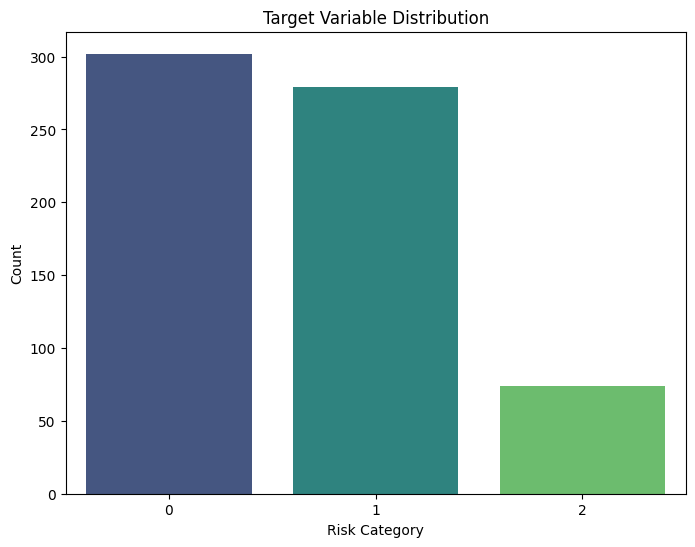

In [100]:
# Set Style
plt.figure(figsize=(8, 6))
sns.countplot(x='RISK', data=data, palette='viridis')
plt.title('Target Variable Distribution')
plt.xlabel('Risk Category')
plt.ylabel('Count')
plt.show()

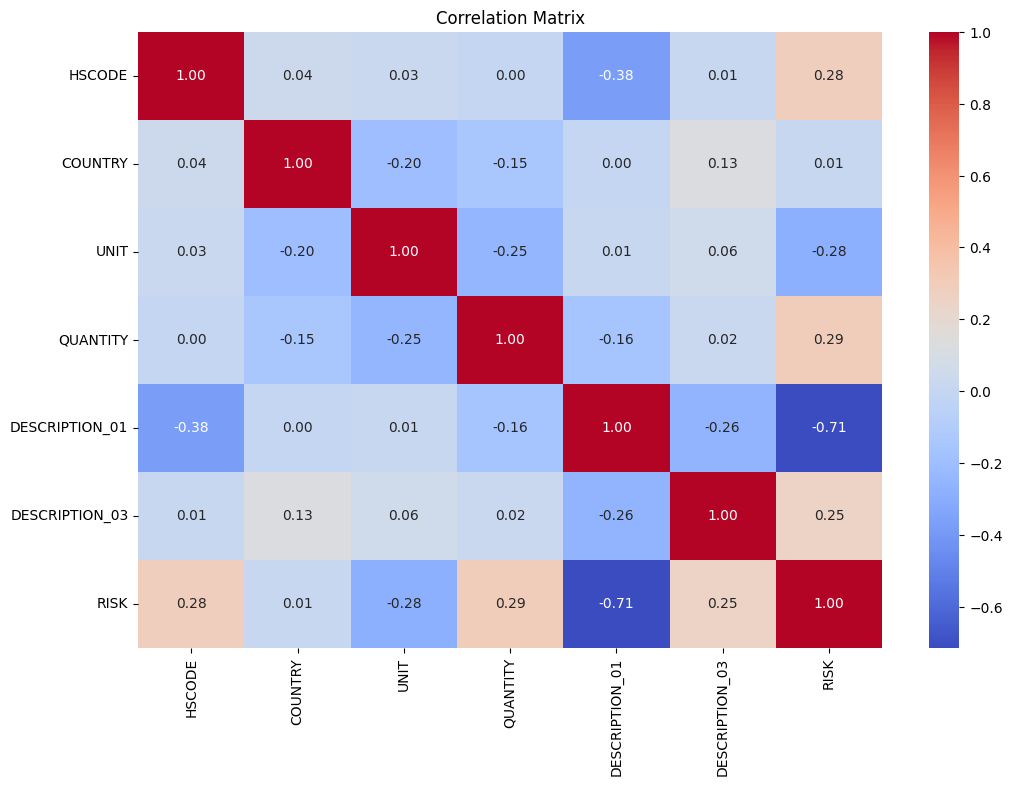

In [101]:
# Checking for the Multicollinearity in the Dataset
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [102]:
# Increasing the influence of 'QUANTITY'
data['QUANTITY'] *= 30

In [103]:
# Features (X) and Target (y)
X = data.drop(['RISK'], axis=1)
y = data['RISK']

In [104]:
# Displaying the Columns in X
print("Columns in X:")
print(X.columns)

Columns in X:
Index(['HSCODE', 'COUNTRY', 'UNIT', 'QUANTITY', 'DESCRIPTION_01',
       'DESCRIPTION_03'],
      dtype='object')


In [105]:
# Splitting dataset into training and testing before SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Training Set Size:", X_train.shape[0])
print("Testing Set Size:", X_test.shape[0])

Training Set Size: 524
Testing Set Size: 131


# **Balancing the Target Variable**

In [106]:
# Handling the imbalance dataset

# Suppressing the FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Handling imbalanced dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Original dataset size:", X.shape)
print("Resampled dataset size:", X_resampled.shape)

Original dataset size: (655, 6)
Resampled dataset size: (906, 6)


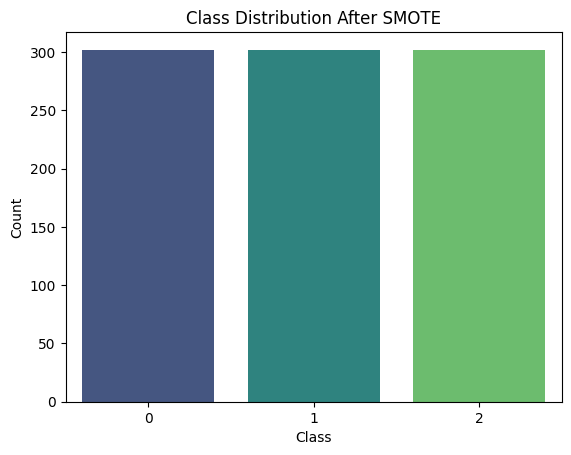

In [107]:
# Plotting class distribution after SMOTE
sns.countplot(x=y_resampled, palette="viridis")
plt.title("Class Distribution After SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [108]:
# Displaying the dataset shape after applying the SMOTE
print(f"Shape of X_resampled: {X_resampled.shape}")
print(f"Shape of y_resampled: {y_resampled.shape}")

Shape of X_resampled: (906, 6)
Shape of y_resampled: (906,)


In [109]:
# Displaying the Columns in X
print("Columns in X Resampled:")
print(X_resampled.columns)

Columns in X Resampled:
Index(['HSCODE', 'COUNTRY', 'UNIT', 'QUANTITY', 'DESCRIPTION_01',
       'DESCRIPTION_03'],
      dtype='object')


In [110]:
# Standardizing the features
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

In [111]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_resampled_scaled, y_resampled, test_size=0.2, stratify = y_resampled, random_state=42)

In [112]:
# Displaying the Dataset Information
print("Dataset Information:")
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 655 entries, 0 to 654
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   HSCODE          655 non-null    int64  
 1   COUNTRY         655 non-null    int64  
 2   UNIT            655 non-null    int64  
 3   QUANTITY        655 non-null    float64
 4   DESCRIPTION_01  655 non-null    int64  
 5   DESCRIPTION_03  655 non-null    int64  
 6   RISK            655 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 35.9 KB
None


In [113]:
# Saving the Preprocessed Code
data.to_csv('/content/drive/MyDrive/Importer_Risk_Prediction_2/Dataset/Preprocessed_data.csv', index=False)

# **Model Training**

In [114]:
# Initialize the RandomForestClassifier (without hyperparameter tuning)
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    bootstrap=True,
    random_state=42
)

In [115]:
# Fit the model to the training data
rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=5, min_samples_split=10,
                       n_estimators=200, random_state=42)

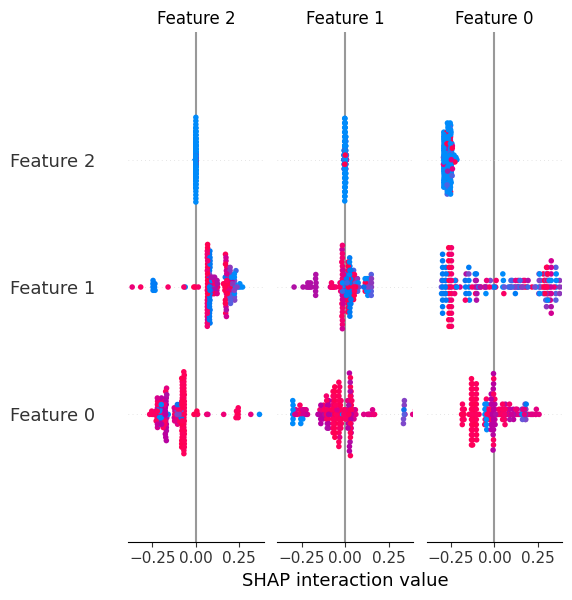

In [116]:
import shap

# Initialize SHAP explainer for RandomForest model
explainer = shap.TreeExplainer(rf)

# Get SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_test, max_display=X_test.shape[1])

In [117]:
# Make predictions
y_pred = rf.predict(X_test)

In [118]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

Confusion Matrix:
[[59  1  0]
 [ 0 61  0]
 [ 0  0 61]]


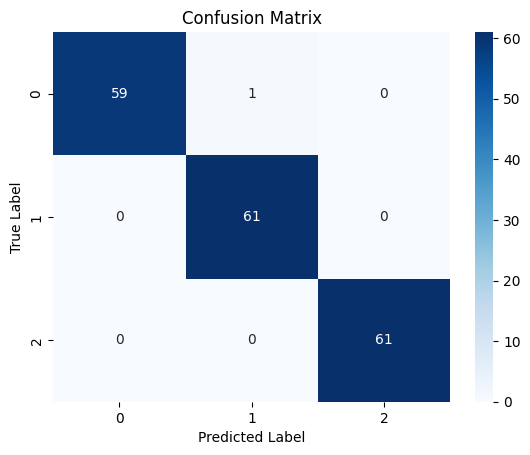

In [119]:
# Plotting Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_resampled), yticklabels=np.unique(y_resampled))
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

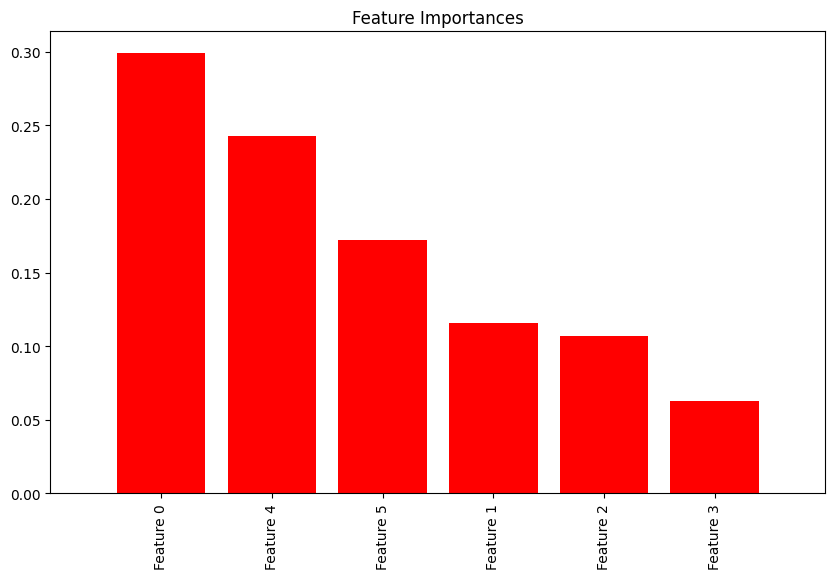

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        60
           1       0.98      1.00      0.99        61
           2       1.00      1.00      1.00        61

    accuracy                           0.99       182
   macro avg       0.99      0.99      0.99       182
weighted avg       0.99      0.99      0.99       182



In [120]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = rf.feature_importances_

# If X_train is a DataFrame, get feature names; otherwise, provide a list manually
try:
    feature_names = X_train.columns  # Works if X_train is a DataFrame
except AttributeError:
    feature_names = [f"Feature {i}" for i in range(X_train.shape[1])]  # Generic names if X_train is a NumPy array

# Sort features by importance
indices = np.argsort(feature_importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), feature_importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), np.array(feature_names)[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()# Classification Report
report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{report}")

In [121]:
# Accuracy score on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy * 100:.2f}%")

Accuracy on test set: 99.45%


In [122]:
import joblib

# Save the Random Forest Model
joblib.dump(rf, '/content/drive/MyDrive/Importer_Risk_Prediction_2/models/random_forest_model.joblib')
print("Random Forest Model Saved Successfully!")

Random Forest Model Saved Successfully!


In [123]:

import joblib
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import warnings
from sklearn.exceptions import DataConversionWarning

# Suppress DataConversionWarning
warnings.filterwarnings("ignore", category=DataConversionWarning)

# Load trained model
try:
    model = joblib.load('/content/drive/MyDrive/Importer_Risk_Prediction_2/models/random_forest_model.joblib')
    print("Model loaded successfully.")
except Exception as e:
    print(f"Error loading model: {e}")
    exit()

# Load LabelEncoder for target variable (RISK)
try:
    label_encoder = joblib.load('/content/drive/MyDrive/Importer_Risk_Prediction_2/label_encoder.pkl')
    print("Target LabelEncoder loaded successfully.")
except Exception as e:
    print(f"Error loading target LabelEncoder: {e}")
    exit()

# Define categorical columns
categorical_columns = ['HSCODE', 'COUNTRY', 'UNIT', 'DESCRIPTION_01', 'DESCRIPTION_03']

# Load LabelEncoders for each categorical column
encoders = {}
for col in categorical_columns:
    try:
        encoder_file = f'/content/drive/MyDrive/Importer_Risk_Prediction_2/encoders/{col}_label_encoder.pkl'
        encoders[col] = joblib.load(encoder_file)
        print(f"{col} LabelEncoder loaded successfully.")
    except Exception as e:
        print(f"Error loading LabelEncoder for {col}: {e}")
        exit()

def get_user_input():
    """Get user input for the prediction."""
    print("\nPlease enter the following details:")
    hscode = input("Enter HS Code: ")
    country = input("Enter Country: ")
    unit = input("Enter Unit: ")
    description_01 = input("Enter Description 1: ")
    description_03 = input("Enter Description 3: ")

    try:
        quantity = float(input("Enter Quantity: "))
    except ValueError:
        print("Invalid quantity. Please enter a numeric value.")
        exit()

    return pd.DataFrame({
        'HSCODE': [hscode],
        'COUNTRY': [country],
        'UNIT': [unit],
        'DESCRIPTION_01': [description_01],
        'DESCRIPTION_03': [description_03],
        'QUANTITY': [quantity]
    })

def preprocess_input(data):
    """Preprocess user input using saved LabelEncoders."""
    try:
        # Prepare the encoded categorical data
        encoded_features = []

        for col in categorical_columns:
            encoder = encoders.get(col)
            if encoder:
                # Transform the input and append the encoded feature
                encoded = encoder.transform(data[[col]])
                encoded_features.append(encoded)
            else:
                print(f"Encoder not found for column: {col}")
                exit()

        # Convert the list of encoded features to a single numpy array
        encoded_features = np.column_stack(encoded_features)

        # Keep numerical features (quantity)
        numerical_features = data[['QUANTITY']].values

        # Combine encoded categorical features with numerical features
        final_features = np.hstack((encoded_features, numerical_features))

        return final_features
    except Exception as e:
        print(f"Error during preprocessing: {e}")
        exit()

def predict_risk():
    """Predict risk level for user input."""
    user_data = get_user_input()
    processed_data = preprocess_input(user_data)

    try:
        # Ensure the input is 2D for the model (shape should be (1, n_features))
        processed_data = np.array(processed_data).reshape(1, -1)

        # Make the prediction (numeric output)
        risk_prediction_numeric = model.predict(processed_data)[0]

        # Decode the predicted risk using the label encoder
        risk_prediction = label_encoder.inverse_transform([risk_prediction_numeric])[0]

        print(f"Predicted Risk Level: {risk_prediction}")

    except Exception as e:
        print(f"Error during prediction: {e}")

if __name__ == "__main__":
    predict_risk()

Model loaded successfully.
Target LabelEncoder loaded successfully.
HSCODE LabelEncoder loaded successfully.
COUNTRY LabelEncoder loaded successfully.
UNIT LabelEncoder loaded successfully.
DESCRIPTION_01 LabelEncoder loaded successfully.
DESCRIPTION_03 LabelEncoder loaded successfully.

Please enter the following details:
Enter HS Code: 3102401000
Enter Country: UKRAINE
Enter Unit: KG
Enter Description 1: Fertilizers
Enter Description 3: Mineral or chemical fertilizers, nitrogenous
Enter Quantity: 2
Predicted Risk Level: Moderate Risk
